In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt 
from matplotlib import ticker as tck

Import the CTD data as a .CSV file and convert the [Date] object type from 'object' to 'datetime64' for a proper temporal analysis.

In [2]:
CTD=pd.read_csv('Juan_De_Fuca_CTD_2016.csv',parse_dates=[0])
CTD

,Date,Depth (m),Beam Attenuation (m^-1),Conductivity (S/m),Density (kg/m3-1000),Dissolved Oxygen (mg/L),Dissolved Oxygen Saturation (%),Fluorescence (mg/m3),Light Transmission (%),pH,Photosynthetically Active Radiation (umol/m2/s),Pressure (dbar),Salinity (PSU),Temperature (deg C),Turbidity (NTU)
0,2016-01-01,1.5,0.5262,3.248383,23.6999,8.126641,84.733236,1.011722,87.6757,NaN,71.581,1.513,30.5456,8.5446,NaN
1,2016-01-01,2.0,0.5127,3.247451,23.7007,8.118716,84.631491,1.165251,87.9702,NaN,59.923,2.017,30.5447,8.5342,NaN
2,2016-01-01,2.5,0.5182,3.247816,23.7002,8.120108,84.652911,1.159346,87.8492,NaN,51.274,2.521,30.5448,8.5382,NaN
3,2016-01-01,3.0,0.5190,3.247974,23.7004,8.143134,84.894957,1.135726,87.8313,NaN,46.258,3.026,30.5453,8.5394,NaN
4,2016-01-01,3.5,0.5183,3.248036,23.7003,8.142170,84.886389,1.145568,87.8460,NaN,40.451,3.530,30.5453,8.5398,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101,2016-12-01,174.0,0.8858,3.378645,24.1501,6.893475,73.268250,0.809089,80.1353,NaN,NaN,175.555,31.2471,9.2005,NaN
4102,2016-12-01,174.5,0.8965,3.379160,24.1556,6.878067,73.104540,0.816832,79.9216,NaN,NaN,176.060,31.2539,9.1986,NaN
4103,2016-12-01,175.0,0.9044,3.380953,24.1753,6.836979,72.670120,0.811025,79.7639,NaN,NaN,176.564,31.2777,9.1921,NaN
4104,2016-12-01,175.5,0.9140,3.383484,24.2025,6.842543,72.730040,0.809089,79.5724,NaN,NaN,177.069,31.3109,9.1837,NaN


In [3]:
CTD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4106 entries, 0 to 4105
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             4106 non-null   datetime64[ns]
 1   Depth (m)                                        4106 non-null   float64       
 2   Beam Attenuation (m^-1)                          4105 non-null   float64       
 3   Conductivity (S/m)                               4105 non-null   float64       
 4   Density (kg/m3-1000)                             4105 non-null   float64       
 5   Dissolved Oxygen (mg/L)                          4105 non-null   float64       
 6   Dissolved Oxygen Saturation (%)                  4105 non-null   float64       
 7   Fluorescence (mg/m3)                             4105 non-null   float64       
 8   Light Transmission (%)                

The CTD data is compsed of one dimensional columns. For the spatiotemporal analysis we'll need to create
a two dimensional array. First we'll creat an MultiIndex from the [Depth (m)] and [Date] collumns. This essentially creates a  single index composed of two variables.

In [4]:
idx=pd.MultiIndex.from_arrays(arrays=[CTD['Depth (m)'],CTD['Date']],names=["Depth","Date"])
idx

MultiIndex([(  1.5, '2016-01-01'),
            (  2.0, '2016-01-01'),
            (  2.5, '2016-01-01'),
            (  3.0, '2016-01-01'),
            (  3.5, '2016-01-01'),
            (  4.0, '2016-01-01'),
            (  4.5, '2016-01-01'),
            (  5.0, '2016-01-01'),
            (  5.5, '2016-01-01'),
            (  6.0, '2016-01-01'),
            ...
            (171.5, '2016-12-01'),
            (172.0, '2016-12-01'),
            (172.5, '2016-12-01'),
            (173.0, '2016-12-01'),
            (173.5, '2016-12-01'),
            (174.0, '2016-12-01'),
            (174.5, '2016-12-01'),
            (175.0, '2016-12-01'),
            (175.5, '2016-12-01'),
            (176.0, '2016-12-01')],
           names=['Depth', 'Date'], length=4106)

Now we will create a series for each variable we are interested in by using the Date/Depth MultiIndex created above as our index. Once that is done we then convert each series into a data array which can be plotted as a contour map.

In [5]:
t=pd.Series(data=CTD['Temperature (deg C)'].values,index=idx)
tda=xr.DataArray.from_series(t)

s=pd.Series(data=CTD['Salinity (PSU)'].values,index=idx)
sda=xr.DataArray.from_series(s)

p=pd.Series(data=CTD['Density (kg/m3-1000)'].values,index=idx)
pda=xr.DataArray.from_series(p)

o=pd.Series(data=CTD['Dissolved Oxygen (mg/L)'].values,index=idx)
oda=xr.DataArray.from_series(o)

f=pd.Series(data=CTD['Fluorescence (mg/m3)'].values,index=idx)
fda=xr.DataArray.from_series(f)

In [6]:
t

Depth  Date      
1.5    2016-01-01    8.5446
2.0    2016-01-01    8.5342
2.5    2016-01-01    8.5382
3.0    2016-01-01    8.5394
3.5    2016-01-01    8.5398
                      ...  
174.0  2016-12-01    9.2005
174.5  2016-12-01    9.1986
175.0  2016-12-01    9.1921
175.5  2016-12-01    9.1837
176.0  2016-12-01       NaN
Length: 4106, dtype: float64

In [7]:
tda

<xarray.DataArray (Depth: 351, Date: 12)>
array([[    nan,     nan,     nan, ..., 10.664 ,     nan,  9.1975],
       [ 8.5446,     nan,     nan, ..., 10.6595, 10.3493,  9.1967],
       [ 8.5342,  8.5952,     nan, ..., 10.6449, 10.3491,  9.199 ],
       ...,
       [    nan,     nan,     nan, ...,     nan,     nan,  9.1921],
       [    nan,     nan,     nan, ...,     nan,     nan,  9.1837],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan]])
Coordinates:
  * Depth    (Depth) float64 1.0 1.5 2.0 2.5 3.0 ... 174.5 175.0 175.5 176.0
  * Date     (Date) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01

Here we calculate the summer and winter average for each variblae in terms of depth. To do this we extract the four summer months (May[5], Jun[6], Jul[7], Aug[8]) and the four winter months (Dec[11], Jan[0], Feb[1], Mar[2]).

In [8]:
meanTs=np.mean(tda[:,[5,6,7,8]],axis=1)
meanTw=np.mean(tda[:,[11,0,1,2]],axis=1)

meanSs=np.mean(sda[:,[5,6,7,8]],axis=1)
meanSw=np.mean(sda[:,[11,0,1,2]],axis=1)

meanPs=np.mean(pda[:,[5,6,7,8]],axis=1)
meanPw=np.mean(pda[:,[11,0,1,2]],axis=1)

meanOs=np.mean(oda[:,[5,6,7,8]],axis=1)
meanOw=np.mean(oda[:,[11,0,1,2]],axis=1)

meanFs=np.mean(fda[:,[5,6,7,8]],axis=1)
meanFw=np.mean(fda[:,[11,0,1,2]],axis=1)

In [9]:
meanTs

<xarray.DataArray (Depth: 351)>
array([10.6413    , 11.093     , 11.03935   , 11.02845   , 11.010025  ,
       10.9975    , 10.990525  , 10.985425  , 10.9808    , 10.976375  ,
       10.965875  , 10.960175  , 10.958025  , 10.95665   , 10.955325  ,
       10.94905   , 10.94125   , 10.9337    , 10.926725  , 10.9153    ,
       10.902225  , 10.89115   , 10.879     , 10.864675  , 10.855575  ,
       10.85865   , 10.8556    , 10.846625  , 10.83465   , 10.823525  ,
       10.815575  , 10.804025  , 10.79195   , 10.78475   , 10.780025  ,
       10.77085   , 10.759575  , 10.749125  , 10.747125  , 10.74625   ,
       10.747425  , 10.740725  , 10.734525  , 10.72905   , 10.72675   ,
       10.723225  , 10.714625  , 10.70445   , 10.69135   , 10.6742    ,
       10.661075  , 10.651575  , 10.645675  , 10.6314    , 10.613675  ,
       10.602275  , 10.593225  , 10.580475  , 10.57065   , 10.5651    ,
       10.562375  , 10.554425  , 10.540375  , 10.52545   , 10.5125    ,
       10.493825  , 10.465275  , 10.433375  , 10.41495   , 10.404325  ,
       10.3962    , 10.389325  , 10.37625   , 10.36995   , 10.3625    ,
       10.35345   , 10.34445   , 10.34185   , 10.342475  , 10.3354    ,
       10.32605   , 10.308225  , 10.296675  , 10.293425  , 10.2905    ,
       10.287875  , 10.282625  , 10.2765    , 10.272525  , 10.2678    ,
       10.2539    , 10.23145   , 10.210325  , 10.19915   , 10.1861    ,
       10.172575  , 10.160775  , 10.150675  , 10.14055   , 10.131925  ,
...
        8.5186    ,  8.5161    ,  8.51415   ,  8.511925  ,  8.5065    ,
        8.5011    ,  8.48605   ,  8.47545   ,  8.4718    ,  8.46185   ,
        8.4568    ,  8.45155   ,  8.446425  ,  8.44065   ,  8.43175   ,
        8.419525  ,  8.41315   ,  8.404     ,  8.3926    ,  8.384525  ,
        8.37365   ,  8.356175  ,  8.3511    ,  8.346725  ,  8.34335   ,
        8.341175  ,  8.339275  ,  8.336775  ,  8.334175  ,  8.331325  ,
        8.328025  ,  8.324     ,  8.318825  ,  8.31275   ,  8.307575  ,
        8.305825  ,  8.3053    ,  8.29915   ,  8.2902    ,  8.279875  ,
        8.266275  ,  8.242375  ,  8.230375  ,  8.22825   ,  8.22485   ,
        8.2175    ,  8.210775  ,  8.204675  ,  8.2011    ,  8.195775  ,
        8.191675  ,  8.185675  ,  8.1795    ,  8.17575   ,  8.17425   ,
        8.17435   ,  8.173025  ,  8.169775  ,  8.166925  ,  8.164     ,
        8.159575  ,  8.1557    ,  8.1499    ,  8.14685   ,  8.144225  ,
        8.141725  ,  8.13885   ,  8.1367    ,  8.131375  ,  8.113625  ,
        8.102375  ,  8.094975  ,  8.0913    ,  8.09075   ,  8.22833333,
        8.23213333,  8.23266667,  8.21476667,  8.1782    ,  8.1432    ,
        8.12756667,  8.12366667,  8.12193333,  8.1206    ,  8.11936667,
        8.11823333,  8.11773333,  8.11743333,  8.11713333,  8.11636667,
        8.11593333,  8.11593333,  8.11653333,  8.0959    ,         nan,
               nan])
Coordinates:
  * Depth    (Depth) float64 1.0 1.5 2.0 2.5 3.0 ... 174.5 175.0 175.5 176.0

This will assign the date and depth values to our axes when the figures are ploted. The negative sign (-) will invert the y-axis so that the surface value (0) is at the top and depth increaeses down towards the x-axis. This makes a depth profile that is more intuitive to read.

In [10]:
x=tda.Date.values
y=-(tda.Depth.values)

This code will remove the negative sign from our y-axis labels.

In [11]:
tck.FuncFormatter
def major_formatter(x, pos):
    label = str(-x) if x < 0 else str(x)
    return label

/var/folders/h7/3cw0306j2p57w3nnkbq_jj8r0000gn/T/ipykernel_24899/3652641889.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[4,1].set_xticklabels(['','Low','','','','','','High',''])


Text(0.85, -0.1, '')

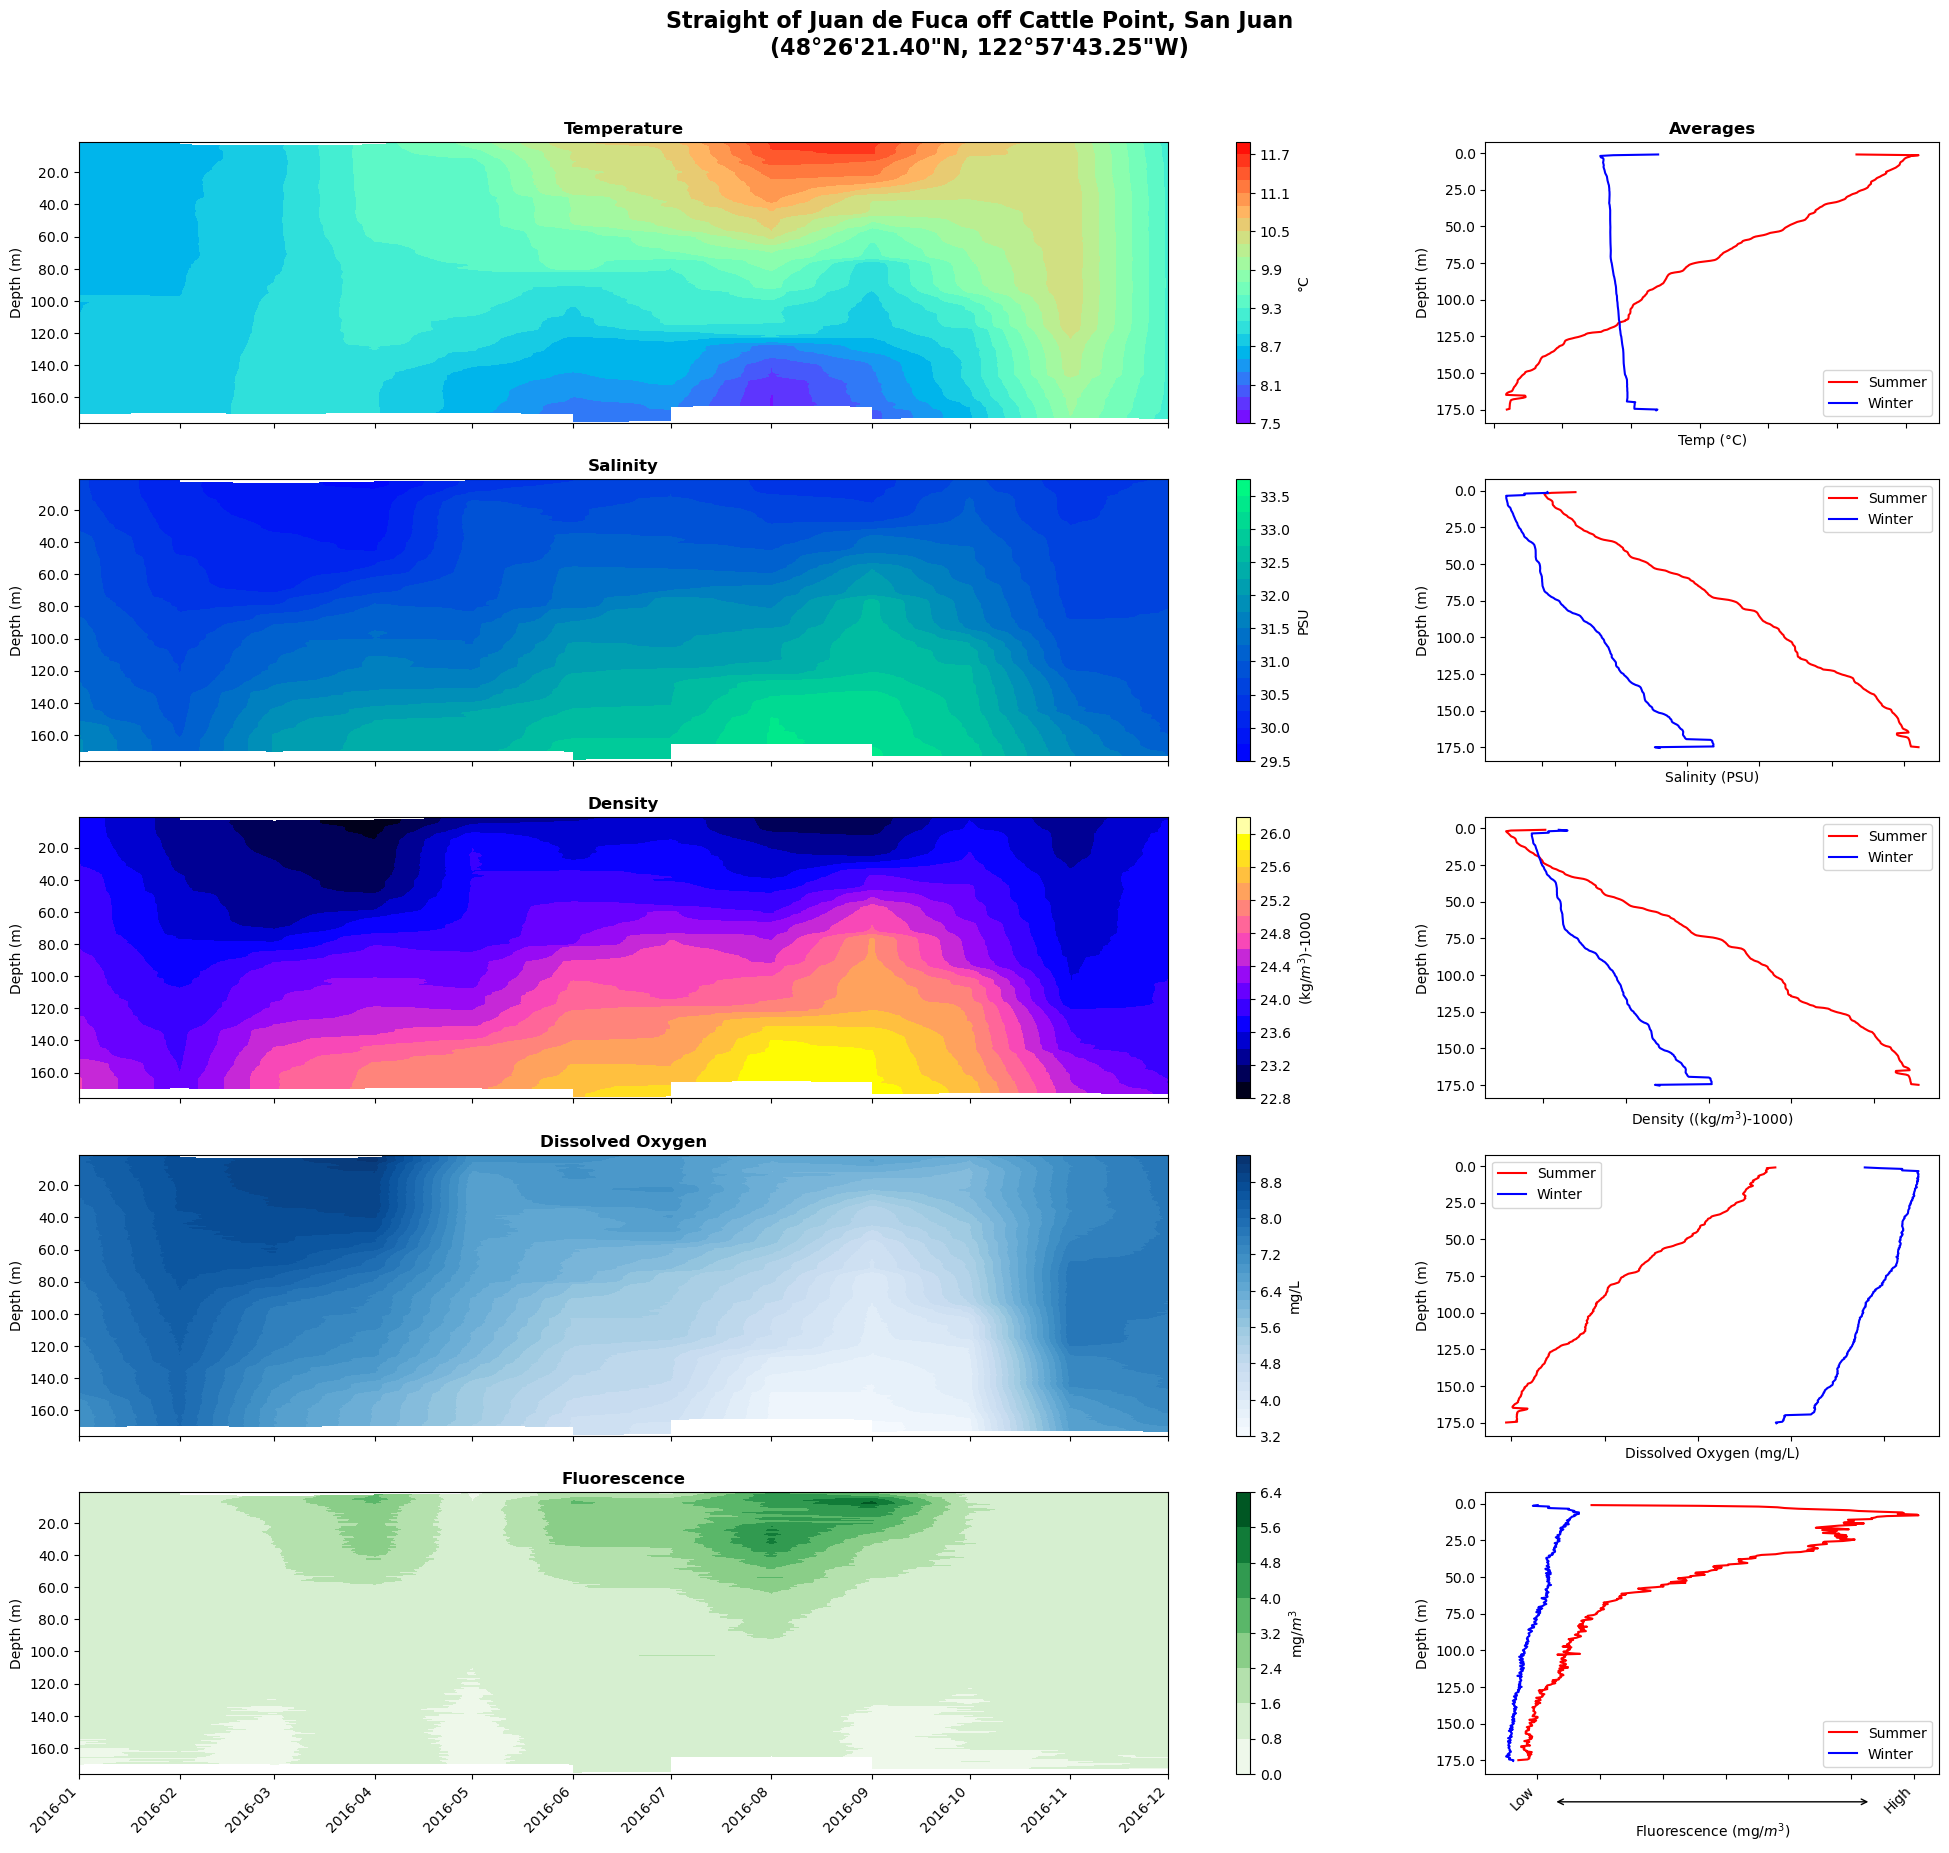

In [12]:
fig,ax=plt.subplots(ncols=2,nrows=5,gridspec_kw={'width_ratios':[15,5]},figsize=(24,24))
fig.suptitle('''Straight of Juan de Fuca off Cattle Point, San Juan\n(48°26'21.40"N, 122°57'43.25"W)''',fontsize=16.0,y=0.935,fontweight='bold')
fig.autofmt_xdate(rotation=45)
plt.subplots_adjust(wspace=0.05)

temp=ax[0,0].contourf(x,y,tda,levels=np.arange(7.5,12,.2),cmap='rainbow')
ax[0,0].yaxis.set_major_formatter(major_formatter)
ax[0,0].set_ylabel('Depth (m)')
ax[0,0].set_title('Temperature',fontweight='bold')
templ=fig.colorbar(temp,ax=ax[0,0])
templ.set_label(chr(176)+'C')

ax[0,1].plot(meanTs,y,color='red')
ax[0,1].plot(meanTw,y,color='blue')
ax[0,1].set_ylabel('Depth (m)')
ax[0,1].yaxis.set_major_formatter(major_formatter)
ax[0,1].set_title('Averages',fontweight='bold')
ax[0,1].set_xlabel('Temp ('+chr(176)+'C'+')')
ax[0,1].legend(['Summer','Winter'],loc='lower right')

salt=ax[1,0].contourf(x,y,sda,levels=np.arange(29.5,34,.25),cmap='winter')
ax[1,0].yaxis.set_major_formatter(major_formatter)
ax[1,0].set_ylabel('Depth (m)')
ax[1,0].set_title('Salinity',fontweight='bold')
saltl=fig.colorbar(salt,ax=ax[1,0])
saltl.set_label('PSU')

ax[1,1].plot(meanSs,y,color='red')
ax[1,1].plot(meanSw,y,color='blue')
ax[1,1].set_ylabel('Depth (m)')
ax[1,1].yaxis.set_major_formatter(major_formatter)
ax[1,1].set_xlabel('Salinity (PSU)')
ax[1,1].legend(['Summer','Winter'],loc='upper right')

dens=ax[2,0].contourf(x,y,pda,levels=np.arange(22.8,26.4,.2),cmap='gnuplot2')
ax[2,0].yaxis.set_major_formatter(major_formatter)
ax[2,0].set_ylabel('Depth (m)')
ax[2,0].set_title('Density',fontweight='bold')
densl=fig.colorbar(dens,ax=ax[2,0])
densl.set_label('(kg/$m^3$)-1000')

ax[2,1].plot(meanPs,y,color='red')
ax[2,1].plot(meanPw,y,color='blue')
ax[2,1].set_ylabel('Depth (m)')
ax[2,1].yaxis.set_major_formatter(major_formatter)
ax[2,1].set_xlabel('Density ((kg/$m^3$)-1000)')
ax[2,1].legend(['Summer','Winter'],loc='upper right')

oxy=ax[3,0].contourf(x,y,oda,levels=np.arange(3.2,9.6,.2),cmap='Blues')
ax[3,0].yaxis.set_major_formatter(major_formatter)
ax[3,0].set_ylabel('Depth (m)')
ax[3,0].set_title('Dissolved Oxygen',fontweight='bold')
oxyl=fig.colorbar(oxy,ax=ax[3,0])
oxyl.set_label('mg/L')

ax[3,1].plot(meanOs,y,color='red')
ax[3,1].plot(meanOw,y,color='blue')
ax[3,1].set_ylabel('Depth (m)')
ax[3,1].yaxis.set_major_formatter(major_formatter)
ax[3,1].set_xlabel('Dissolved Oxygen (mg/L)')
ax[3,1].legend(['Summer','Winter'],loc='upper left')

flr=ax[4,0].contourf(x,y,fda,levels=np.arange(0,6.5,.8),cmap='Greens')
ax[4,0].yaxis.set_major_formatter(major_formatter)
ax[4,0].set_ylabel('Depth (m)')
ax[4,0].set_title('Fluorescence',fontweight='bold')
flrl=fig.colorbar(flr,ax=ax[4,0])
flrl.set_label('mg/$m^3$')

ax[4,1].plot(meanFs,y,color='red')
ax[4,1].plot(meanFw,y,color='blue')
ax[4,1].set_ylabel('Depth (m)')
ax[4,1].yaxis.set_major_formatter(major_formatter)
ax[4,1].set_xlabel('Fluorescence (mg/$m^3$)')
ax[4,1].legend(['Summer','Winter'],loc='lower right')
ax[4,1].set_xticklabels(['','Low','','','','','','High',''])
ax[4,1].annotate('', xy=(0.15, -0.1), xycoords='axes fraction', xytext=(0.85, -0.1), arrowprops=dict(arrowstyle="<->"))